SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-4.  0.]]

  [[ 0. -4.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-3.  0.]]

  [[ 0. -3.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-1.  0.]]

  [[ 0. -1.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[0. 0.]]

  [[0. 0.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[1. 0.]]

  [[0. 1.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[3. 0.]]

  [[0. 3.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[4. 0.]]

  [[0. 4.]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[2.82842712 0.        ]]

  [[0.         2.82842712]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-2.4492936e-16  0.0000000e+00]]

  [[ 0.0000000e+00 -2.4492936e-16]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-2.82842712  0.        ]]

  [[ 0.         -2.82842712]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-4.  0.]]

  [[ 0. -4.]]]]


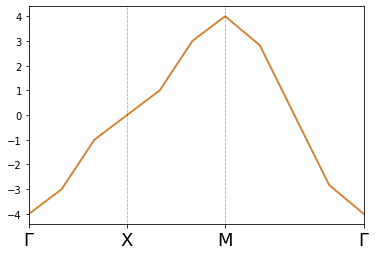

In [30]:
import numpy as np
import pylab as plt 

from local_pythtb_NC import tb_model
from local_pythtb_NC import wf_array

two_pi=2*np.pi

def get_model(t):
    lat = [ [1.0, 0.0], [0.0, 1.0] ]
    orb = [ [0.0, 0.0] ]
    dimk=2; dimr=2
    mymodel=tb_model(dimk, dimr, lat, orb, nspin=2)
    
    sz = np.array( [ 0, 0, 0, 1 ] )

    mymodel.set_onsite([0])
    mymodel.set_hop( t , 0, 0, [1,0])
    mymodel.set_hop( t , 0, 0, [0,1])
    #tp= 0.1*t
    #mymodel.set_hop( tp*sz, 0, 0, [1,0] , mode='add' )
    #mymodel.set_hop( tp*sz, 0, 0, [0,1] , mode='add' )
    
    return mymodel

def get_ham(k_list, t):
    k_list = 2*np.pi*np.array(k_list)
    ham = np.zeros(len(k_list), dtype=float)
    for ik, k in enumerate(k_list):
        ham[ik] = -2*t*(np.cos(k[0])+np.cos(k[1]))
    return ham

def Bands(model):
    path=[[0.,0.], [0.5, 0.],[0.5, 0.5],[0.,0.]]
    label=['$\Gamma$', 'X', 'M','$\Gamma$']
    (k_vec,k_dist,k_node)=model.k_path(path,11, report=False);
    evals, evecs=model.solve_all(k_vec, eig_vectors=True)
    
    #plt.figure(1, figsize=(12, 3))
    #plt.subplot(131)
    for j in range(evals.shape[0]):
        plt.plot(k_dist, evals[j])

    for n in range(len(k_node)): plt.axvline(x=k_node[n],linewidth=0.5,ls=':', color='k')
    plt.xticks(k_node, label, fontsize=18)
    plt.xlim(k_node[0], k_node[-1])
        
    #plt.subplot(132)
    #EneL = get_ham(k_vec, 1.)
    #plt.plot(k_dist, EneL)
    #for n in range(len(k_node)): plt.axvline(x=k_node[n],linewidth=0.5,ls=':', color='k')
    #plt.xticks(k_node, label, fontsize=18)
    #plt.xlim(k_node[0], k_node[-1])
    
    #plt.subplot(133)
    
    #plt.plot(k_dist, EneL-evals.flatten())
    
    
t=-1.0
model = get_model(t)
#model.display()
Bands(model)
    

In [11]:
HH = np.zeros((5, 2, 2))

print (HH[4,0,0])

0.0


In [31]:
def get_ham_spin1(k_list, t=-1.):
    k_list = 2*np.pi*np.array(k_list)
    Nk = len(k_list)
    ham = np.zeros( (Nk, 2, 2), dtype=float)
    
    for ik, k in enumerate(k_list):
        for i in range(2):
            ham[ik,i,i] = 2*t*(np.cos(k[0])+np.cos(k[1]))
    return ham

def get_ham_spin(k_list, t=-1.):
    k_list = 2*np.pi*np.array(k_list)
    Nk = len(k_list)
    ham = np.zeros( (Nk, 1, 2, 1, 2), dtype=float)
    for ik, k in enumerate(k_list):
        ham[ik,:,0,:,0] = -2*t*(np.cos(k[0])+np.cos(k[1]))
        ham[ik,:,1,:,1] = -2*t*(np.cos(k[0])+np.cos(k[1]))
        #for i in range(2):
        #    ham[ik,i,i] = -2*t*(np.cos(k[0])+np.cos(k[1]))
    return ham

from get_kpath import *

def Bands_spin():
    path = [ [0., 0.], [0.5, 0.0], [0.5, 0.5], [0., 0.] ]
    Nk=41
    (k_vec,k_dist,k_node) = get_kpts_2D(path, Nk, Print=False)
    H = get_ham_spin(k_vec, t)
    Ek = np.zeros( (Nk,2), dtype=float)
    for ik in range(Nk):
        evals, evecs = np.linalg.eig(H[ik])
        Ek[ik,:] = evals
    for i in range(2):
        plt.plot(k_dist, Ek[:,i])
        

Bands_spin()
    

LinAlgError: Last 2 dimensions of the array must be square